<a href="https://colab.research.google.com/github/lohansilva/ifood-dev-week/blob/main/ifood_dev_week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# iFood Dev Week

Saiba mais sobre essa semana incrível no Artigo [Desvendando a iFood Dev Week](https://www.dio.me/articles/desvendando-a-ifood-dev-week).

## Dia 1: Conheça o Google Colab e o Projeto Desta Dev Week

Vamos mergulhar no Google Colab, aprendendo como ele pode ser usado para automatizar tarefas cotidianas, principalmente através da manipulação de planilhas. Além disso, você aprenderá na prática o conceito do Net Promoter Score (NPS), uma métrica fundamental para entender a satisfação do cliente.

In [2]:
# Importar bibliotecas
import gdown
import pandas as pd

# Baixar o arquivo CSV do Google Drive e carregar seus dados em um DataFrame pandas
file_id = '11yeewp-D_QQmPcAmxQvWf0HJa1YDtrJA'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'feedbacks.csv')

Downloading...
From: https://drive.google.com/uc?id=11yeewp-D_QQmPcAmxQvWf0HJa1YDtrJA
To: /content/feedbacks.csv
100%|██████████| 299/299 [00:00<00:00, 1.04MB/s]


'feedbacks.csv'

In [3]:
# Leitura do arquivo
dados = pd.read_csv('/content/feedbacks.csv', delimiter=';')

In [4]:
# Versão 1: Implementar a lógica de NPS em comandos simples e sequenciais (imperativo)
detratores = 0
promotores = 0

notas = dados['nota']
for nota in notas:
  if nota >=9:
    promotores += 1
  elif nota <= 6:
    detratores += 1

nps = (promotores - detratores) / len(notas) * 100
print(nps)

40.0


In [4]:
# Versão 2: Evoluir a implementação para separar melhor as responsabilidades (funcional)
def calcular_nps(notas):
  detratores = notas.apply(lambda nota: nota <= 6).sum()
  promotores = notas[notas >= 9].count()

  return nps

notas = dados['nota']
print(calcular_nps(notas))

40.0


In [5]:
# Versão 3: Abstrair o problema usando classes e objetos (orientação a objetos)
class Feedback:
  def __init__(self, nota, comentario):
    self.nota = nota
    self.comentario = comentario

class AnalisadorFeedbacks:
  def __init__(self, feedbacks):
    self.feedbacks = feedbacks

  def calcular_nps(self):
    detratores = sum([1 for feedback in self.feedbacks if feedback.nota <= 6])
    promotores = sum([1 for feedback in self.feedbacks if feedback.nota >= 9])

    nps = (promotores - detratores) / len(self.feedbacks) * 100
    return nps


# feedbacks = [Feedback(linha['nota'], linha['comentario']) for i, linha in dados.iterrows()]
feedbacks = dados.apply(lambda linha: Feedback(linha['nota'], linha['comentario']),axis=1)


analisador = AnalisadorFeedbacks(feedbacks)
nps = analisador.calcular_nps()

print(nps)


40.0


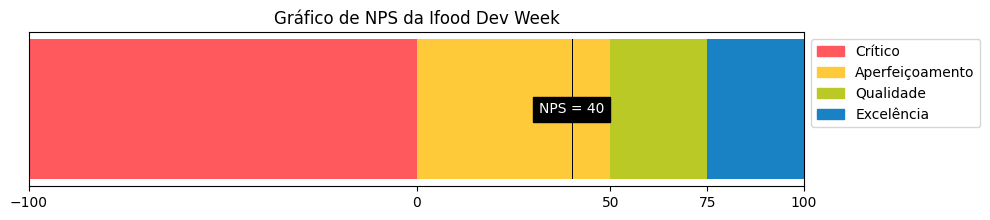

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#definição das constantes que usaremos para visualizar o nps
NPS_ZONAS = ["Crítico", "Aperfeiçoamento", "Qualidade", "Excelência"]
NPS_VALORES = [-100, 0, 50, 75, 100]
NPS_CORES = ["#FF595E", "#FFCA3A", "#BAC926", "#1982C4"]

#criar gráfico usando "matplotlib" para visualizar o NPS que calculamos no dia 1
def criar_grafico_nps(nps):
  fig, ax = plt.subplots(figsize=(10, 2))

  for i, zona in enumerate(NPS_ZONAS):
    ax.barh([0], width=NPS_VALORES[i+1] - NPS_VALORES[i], left=NPS_VALORES[i], color=NPS_CORES[i])

  ax.barh([0], width=0.5, left=nps, color='black')
  ax.set_yticks([])
  ax.set_xlim(-100, 100)
  ax.set_xticks(NPS_VALORES)

  patches = [mpatches.Patch(color=NPS_CORES[i], label=NPS_ZONAS[i]) for i in range(len(NPS_ZONAS))]
  plt.legend(handles=patches, bbox_to_anchor=(1,1))

  plt.text(nps, 0, f'NPS = {nps:.0f}', ha='center', va='center', color='white', bbox=dict(facecolor='black'))

  plt.title('Gráfico de NPS da Ifood Dev Week')

  plt.show()

criar_grafico_nps(nps)